## BLM442 Keşif aktivitesi-5: Makine Öğrenmesi

#### İsim/Soyisim: Houssem MENHOUR
#### Öğrenci Numarası: 140201115
#### E-mail: husmen93@gmail.com
#### Kullanılan dataset adı: The Economic Freedom Index
#### Dataset url: https://www.kaggle.com/lewisduncan93/the-economic-freedom-index

#### İntihal: 
Netten alınacak kısmi kod parçaları önceden kod içinde/raporda belirtilmek ve soru sorulduğunda cevaplanması durumunda sıkıntı çıkarmayacaktır. (i) Internet kaynağını belirtmeyen/açıklayamayan/üzerinde geliştirme yapmayan veya (ii) birbirleriyle benzer/aynı çalışma teslim edenlerin aktiviteleri sıfır üzerinden değerlendirilecektir.

#### KA-5 Gönderim şekli

1-pdf olarak "ogrenciNo.pdf" dokumanını gonderme
-calisma dosyasında (File -> Print Preview) sonrası olusan html dosyasını yazdır deyip pdf olarak kaydetme veya
-(File -> Download as -> HTML) seklinde indirip pdf'e cevirme http://html2pdf.com/

2-(File -> Download as -> Notebook) indirip "ogrenciNo.ipynb" dokumanını gonderme

suleyman.eken@kocaeli.edu.tr

#### Kısım 1 (Regresyon Analizi): Daha once kullanmıs oldugunuz (kesif aktivitesi 1 spreadsheet) veriseti üzerindeki kolonlar (Nümerik predictors ve nümerik cikti) arasındaki pozitif ve negatif korelasyonu bulunuz.  r veya R^2  değerlerini belirleyiniz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

In [2]:
# Load data and display info
data = pd.read_csv("../datasets/economic_freedom_index2019_data.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
CountryID                      186 non-null int64
Country Name                   186 non-null object
WEBNAME                        186 non-null object
Region                         186 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freed

In [3]:
# select numeric columns
num_data = data.select_dtypes("float64")
# remove rankings, keep only score
num_data = num_data.drop(columns=["World Rank","Region Rank"])
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 23 columns):
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freedom             184 non-null float64
Financial Freedom              181 non-null float64
Tariff Rate (%)                182 non-null float64
Income Tax Rate (%)            183 non-null float64
Corporate Tax Rate (%)         183 non-null float64
Tax Burden % of GDP            179 non-null float64
Gov't Expen

In [4]:
corr_mat = num_data.corr()

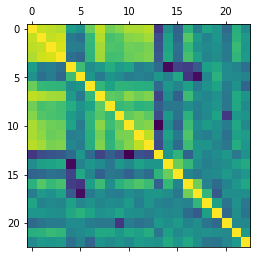

In [5]:
# plot the heatmap with matplotlib
plt.matshow(corr_mat)
plt.show()

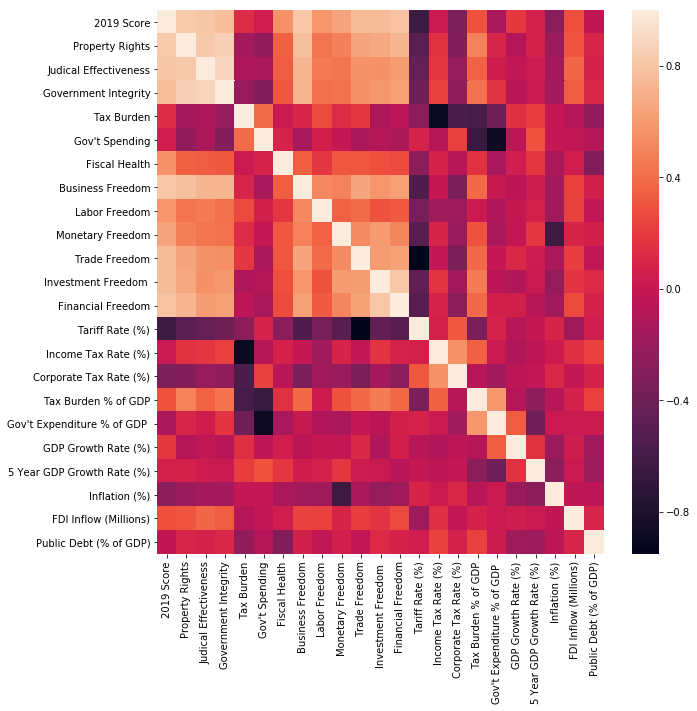

In [6]:
# plot the heatmap with seaborn
plt.figure(figsize=(10,10)) 
sns.heatmap(corr_mat, 
        xticklabels=corr_mat.columns,
        yticklabels=corr_mat.columns)

In [7]:
# display correlation values
corr_mat.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
2019 Score,1,0.83,0.8,0.76,0.14,0.045,0.56,0.81,0.58,0.65,0.75,0.75,0.79,-0.64,0.0092,-0.33,0.3,-0.13,0.19,0.064,-0.28,0.28,-0.036
Property Rights,0.83,1,0.82,0.86,-0.15,-0.24,0.35,0.78,0.43,0.47,0.65,0.67,0.73,-0.49,0.16,-0.3,0.49,0.099,-0.075,0.072,-0.2,0.3,0.097
Judical Effectiveness,0.8,0.82,1,0.88,-0.11,-0.14,0.34,0.73,0.46,0.44,0.57,0.55,0.61,-0.44,0.18,-0.22,0.36,0.033,-0.023,0.028,-0.16,0.37,0.074
Government Integrity,0.76,0.86,0.88,1,-0.22,-0.3,0.32,0.72,0.41,0.42,0.54,0.58,0.63,-0.4,0.23,-0.25,0.42,0.17,-0.064,0.014,-0.15,0.33,0.1
Tax Burden,0.14,-0.15,-0.11,-0.22,1,0.39,0.016,0.093,0.26,0.13,0.18,-0.12,-0.052,-0.27,-0.9,-0.56,-0.59,-0.4,0.15,0.21,-0.01,-0.081,-0.24
Gov't Spending,0.045,-0.24,-0.14,-0.3,0.39,1,0.083,-0.15,0.055,-0.01,-0.13,-0.088,-0.13,0.079,-0.076,0.22,-0.65,-0.89,-0.05,0.29,-0.0078,-0.029,-0.077
Fiscal Health,0.56,0.35,0.34,0.32,0.016,0.083,1,0.34,0.18,0.32,0.31,0.28,0.26,-0.27,0.076,-0.064,0.15,-0.14,0.046,0.18,-0.13,0.042,-0.31
Business Freedom,0.81,0.78,0.73,0.72,0.093,-0.15,0.34,1,0.51,0.48,0.66,0.57,0.62,-0.55,0.00035,-0.34,0.39,0.002,-0.054,0.035,-0.17,0.23,0.055
Labor Freedom,0.58,0.43,0.46,0.41,0.26,0.055,0.18,0.51,1,0.36,0.4,0.29,0.33,-0.36,-0.17,-0.18,0.019,-0.11,-0.0018,0.07,-0.18,0.21,-0.026
Monetary Freedom,0.65,0.47,0.44,0.42,0.13,-0.01,0.32,0.48,0.36,1,0.53,0.6,0.51,-0.51,0.09,-0.2,0.3,-0.12,-0.02,0.18,-0.64,0.086,0.058


#### Kısım 2 (Ekteki verisetlerinden biri üzerinde herhangi bir sınıflandırma algoritması gerçekleme) Sectiginiz verisetini Google Drive'da belirtiniz. Her kişi farklı veriseti seçmelidir. Veriseti üzerinde gerekiyorsa birtakım önişlemler yapılmalı, bir sınıflandırma modeli olusturularak modelin performansı çeşitli metriklerle sunulmalıdır.

https://docs.google.com/spreadsheets/d/19g8vDmC20FQGo2t-NQNb1MD6jwcJvfIJXwxl7vQCIlA/edit?usp=sharing

In [8]:
# load data
data2 = pd.read_excel("../datasets/Z-Alizadeh sani dataset.xlsx", sheet_name="Sheet 1 - Table 1") 
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
Age                      303 non-null int64
Weight                   303 non-null int64
Length                   303 non-null int64
Sex                      303 non-null object
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null object
CRF                      303 non-null object
CVA                      303 non-null object
Airway disease           303 non-null object
Thyroid Disease          303 non-null object
CHF                      303 non-null object
DLP                      303 non-null object
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak 

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [9]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [10]:
# clean data
# extract labels
labels = data2["Cath"]
# change non-num representations
rep_map = {"Male": 0, "Fmale": 1, 
           "N": 0, "Y": 1, 
           "LBBB": 1, "RBBB": 2,
           "mild": 1, "Moderate": 2, "Severe": 3,
           "Normal": 0, "Cad": 1}
#data_training["Sex"].map({"Male": 0, "Fmale": 1})
data2 = data2.replace(rep_map)
# remove unnecessary columns
data2 = data2.drop(columns=["Exertional CP","Cath"])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 54 columns):
Age                      303 non-null int64
Weight                   303 non-null int64
Length                   303 non-null int64
Sex                      303 non-null int64
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null int64
CRF                      303 non-null int64
CVA                      303 non-null int64
Airway disease           303 non-null int64
Thyroid Disease          303 non-null int64
CHF                      303 non-null int64
DLP                      303 non-null int64
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak Peripher

In [11]:
# normalize data
data2_norm = (data2 - data2.mean()) / (data2.max() - data2.min())
data2_norm.info()
data2_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 54 columns):
Age                      303 non-null float64
Weight                   303 non-null float64
Length                   303 non-null float64
Sex                      303 non-null float64
BMI                      303 non-null float64
DM                       303 non-null float64
HTN                      303 non-null float64
Current Smoker           303 non-null float64
EX-Smoker                303 non-null float64
FH                       303 non-null float64
Obesity                  303 non-null float64
CRF                      303 non-null float64
CVA                      303 non-null float64
Airway disease           303 non-null float64
Thyroid Disease          303 non-null float64
CHF                      303 non-null float64
DLP                      303 non-null float64
BP                       303 non-null float64
PR                       303 non-null float64
Edema                

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD
0,-0.105316,0.224560,0.214246,-0.419142,0.093895,-0.29703,0.409241,0.792079,-0.033003,-0.158416,...,0.281211,0.130363,0.000118,-0.130213,0.124541,-0.142956,0.055107,0.061533,-0.155116,-0.259626
1,0.144684,-0.053218,-0.160754,0.580858,0.050488,-0.29703,0.409241,-0.207921,-0.033003,-0.158416,...,0.085809,0.130363,0.535832,0.009647,0.105673,-0.090325,-0.078784,-0.160689,0.844884,-0.259626
2,-0.087459,-0.275440,-0.014920,-0.419142,-0.314721,-0.29703,-0.590759,0.792079,-0.033003,-0.158416,...,0.039832,0.130363,-0.071311,-0.011332,0.105673,-0.002606,0.011871,-0.160689,0.344884,0.073707
3,0.126827,-0.094884,-0.139920,0.580858,-0.017981,-0.29703,0.409241,-0.207921,-0.033003,-0.158416,...,-0.121088,0.047030,0.035832,0.380276,-0.271686,0.207921,0.725958,0.172644,-0.155116,0.740374
4,-0.158887,0.182893,-0.244087,0.580858,0.435231,-0.29703,0.409241,-0.207921,-0.033003,-0.158416,...,0.005349,-0.064081,-0.035596,0.114542,0.426428,-0.371027,0.073238,0.061533,-0.155116,0.740374


In [12]:
# split train and test, 80% 20%
X_train, X_test, y_train, y_test = train_test_split(data2_norm.values, labels.values, test_size=0.20, random_state=42)

clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
# get performance metrics
y_test_pred = []
for e in X_test:
    y_test_pred.append(clf.predict([e]))

print(confusion_matrix(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[40  3]
 [ 8 10]]
0.819672131147541
              precision    recall  f1-score   support

         Cad       0.83      0.93      0.88        43
      Normal       0.77      0.56      0.65        18

   micro avg       0.82      0.82      0.82        61
   macro avg       0.80      0.74      0.76        61
weighted avg       0.81      0.82      0.81        61



#### Kısım 3 (Dünya kupası verini kumeleme) Herhangi bir kümeleme yontemi ile kumelenmeli ve modelin performansı sunulmalıdır.

In [14]:
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [15]:
data3 = pd.read_csv("../datasets/Players.csv")
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 8 columns):
surname     595 non-null object
team        595 non-null object
position    595 non-null object
minutes     595 non-null int64
shots       595 non-null int64
passes      595 non-null int64
tackles     595 non-null int64
saves       595 non-null int64
dtypes: int64(5), object(3)
memory usage: 37.3+ KB


In [16]:
# select numeric columns
num_data = data3.select_dtypes("int64")
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 5 columns):
minutes    595 non-null int64
shots      595 non-null int64
passes     595 non-null int64
tackles    595 non-null int64
saves      595 non-null int64
dtypes: int64(5)
memory usage: 23.3 KB


In [17]:
# damping, sample preference
af = AffinityPropagation(damping=0.975).fit(num_data)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print("Silhouette Coefficient: %0.3f" % silhouette_score(num_data, labels, metric='sqeuclidean'))

Silhouette Coefficient: 0.544


In [18]:
dic = {i: np.where(labels == i)[0] for i in range(n_clusters_)}
for key, value in dic.items():
    print("\ncluster {}:".format(key))
    for e in value:
        print("{} : {}".format(e, data3.iloc[e,:].values))


cluster 0:
1 : ['Belhadj' 'Algeria' 'defender' 270 1 146 8 0]
10 : ['Lacen' 'Algeria' 'midfielder' 270 0 158 8 0]
16 : ['Yebda' 'Algeria' 'midfielder' 269 8 138 10 0]
30 : ['Otamendi' 'Argentina' 'defender' 250 0 141 6 0]
37 : ['Veron' 'Argentina' 'midfielder' 185 3 235 10 0]
43 : ['Culina' 'Australia' 'midfielder' 270 4 153 0 0]
52 : ['Neill' 'Australia' 'defender' 270 1 135 4 0]
55 : ['Valeri' 'Australia' 'midfielder' 245 0 135 5 0]
89 : ['Makoun' 'Cameroon' 'midfielder' 210 4 164 2 0]
91 : ['Mbia' 'Cameroon' 'defender' 270 3 135 4 0]
93 : ["N'Koulou" 'Cameroon' 'defender' 253 0 152 4 0]
98 : ['Carmona' 'Chile' 'midfielder' 270 1 175 9 0]
106 : ['Medel' 'Chile' 'defender' 270 1 123 7 0]
115 : ['Vidal' 'Chile' 'defender' 306 6 178 17 0]
116 : ['Agger' 'Denmark' 'defender' 270 2 120 10 0]
119 : ['Christian Poulsen' 'Denmark' 'midfielder' 270 1 179 7 0]
136 : ['Barry' 'England' 'midfielder' 264 2 171 8 0]
169 : ['Sagna' 'France' 'defender' 270 0 125 4 0]
174 : ['Boateng' 'Germany' 'def

330 : ['Stekelenburg' 'Netherlands' 'goalkeeper' 540 0 149 0 15]
337 : ['van Persie' 'Netherlands' 'forward' 479 14 108 1 0]
405 : ['Villar' 'Paraguay' 'goalkeeper' 480 0 99 0 10]
521 : ['Casillas' 'Spain' 'goalkeeper' 540 0 67 0 11]
535 : ['Villa' 'Spain' 'forward' 529 22 169 2 0]
570 : ['Muslera' 'Uruguay' 'goalkeeper' 570 0 75 0 16]
573 : ['Suarez' 'Uruguay' 'forward' 452 19 127 4 0]

cluster 6:
11 : ["M'Bolhi" 'Algeria' 'goalkeeper' 180 0 30 0 12]
41 : ['Carney' 'Australia' 'defender' 180 0 56 4 0]
95 : ['Webo' 'Cameroon' 'forward' 168 4 39 3 0]
127 : ['Kahlenberg' 'Denmark' 'midfielder' 159 2 59 3 0]
128 : ['Kjaer' 'Denmark' 'defender' 180 1 41 3 0]
134 : ['Tomasson' 'Denmark' 'forward' 176 7 51 1 0]
139 : ['Defoe' 'England' 'forward' 173 5 17 1 0]
143 : ['Heskey' 'England' 'forward' 176 2 53 7 0]
148 : ['Lennon' 'England' 'midfielder' 153 0 43 1 0]
149 : ['Milner' 'England' 'midfielder' 185 1 57 6 0]
164 : ['Govou' 'France' 'forward' 162 1 35 4 0]
201 : ['Inkoom' 'Ghana' 'defende

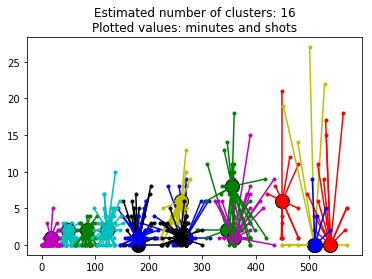

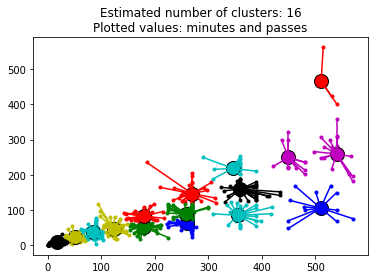

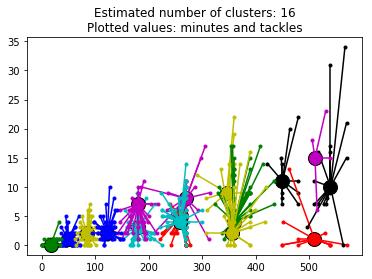

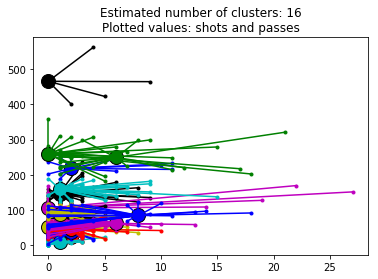

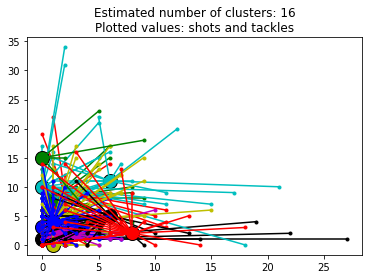

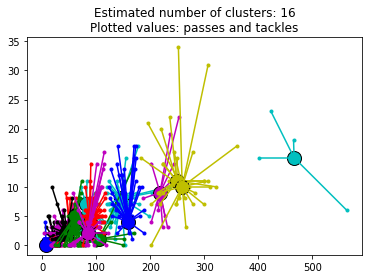

In [20]:
#dataframe to numpy array
X = num_data.values

plt.close('all')
plt.figure(1)
plt.clf()

#plot different pairs of values:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i in range(4):
    for j in range(i+1,4):
        for k, col in zip(range(n_clusters_), colors):
            class_members = labels == k
            cluster_center = X[cluster_centers_indices[k]]
            plt.plot(X[class_members, i], X[class_members, j], col + '.')
            plt.plot(cluster_center[i], cluster_center[j], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=14)
            for x in X[class_members]:
                plt.plot([cluster_center[i], x[i]], [cluster_center[j], x[j]], col)

        plt.title('Estimated number of clusters: {}\nPlotted values: {} and {}'.format(n_clusters_, num_data.columns.values[i], num_data.columns.values[j]))
        plt.show()